# Import Library

In [1]:
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Load data and Data Exploration

In [2]:
data = pd.read_csv('datafix.csv')
data = pd.DataFrame(data)
data

,Nama Jalan,Latitude,Longtitude,Lajur,Waktu,Hari,Tanggal,MOTOR,MOBIL,BUS/TRUK,JUMLAH,HEADWAY(s),GAP(s),85 P SPEED (Km/Jam),AVG. SPEED (Km/Jam),OCCUPANCY (%),LEBAR JALAN (m),PANJANG ANTRIAN (m)
0,SP. BUAH BATU,-6.947987,107.633434,LURUS KANAN,SORE,KAMIS,07-04-2022 16:00,479,292,53,824,0.37,10.28,47.50,21.31,86.30,21.0,700
1,SP. SAMSAT,-6.945438,107.641889,LURUS KANAN,PAGI,SELASA,12-04-2022 7:00,4232,206,139,4577,0.00,1.71,60.25,11.94,85.21,21.0,700
2,SP. BUAH BATU,-6.947987,107.633434,Lurus kanan,PAGI,KAMIS,21-04-2022 07:00,1202,746,107,2055,0.00,2.36,39.25,12.62,84.38,21.0,700
3,SP. PASIR KOJA,-6.930399,107.576040,LURUS KANAN,SORE,SELASA,26-04-2022 16:00,565,535,292,1392,0.12,5.03,42.25,18.19,83.65,22.0,700
4,SP. SAMSAT,-6.945438,107.641889,Lurus kanan,PAGI,RABU,20-04-2022 07:00,2211,1801,179,4191,0.00,1.08,44.50,15.50,82.46,21.0,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,SP. ISTANA PLAZA,-6.906442,107.597545,BELOK KIRI,SORE,JUMAT,08-04-2022 16:00,19,12,17,48,30.27,158.46,42.50,14.19,0.00,14.0,0
3800,SP. ISTANA PLAZA,-6.906442,107.597545,BELOK KIRI,SORE,JUMAT,15-04-2022 16:00,10,17,1,28,10.31,71.82,56.00,46.50,0.00,14.0,0
3801,SP. ISTANA PLAZA,-6.906442,107.597545,Belok kiri,SORE,JUMAT,22-04-2022 16:00,4,36,7,47,154.62,155.17,56.50,14.56,0.00,14.0,0
3802,SP. PASIR KOJA,-6.930399,107.576040,LURUS KANAN,SORE,MINGGU,03-04-2022 16:00,2,5,1,8,2.31,295.91,42.50,29.38,0.00,22.0,0


In [3]:
#melakukan cek semua kolom pada dataframe
data.columns

Index(['Nama Jalan', 'Latitude', 'Longtitude', 'Lajur', 'Waktu', 'Hari',
       'Tanggal', 'MOTOR', 'MOBIL', 'BUS/TRUK', 'JUMLAH', 'HEADWAY(s)',
       'GAP(s)', '85 P SPEED (Km/Jam)', 'AVG. SPEED (Km/Jam)', 'OCCUPANCY (%)',
       'LEBAR JALAN (m)', 'PANJANG ANTRIAN (m)'],
      dtype='object')

In [4]:
#melakukan cek nama jalan kolom pada dataframe
data['Nama Jalan'].unique()

array(['SP. BUAH BATU', 'SP. SAMSAT', 'SP. PASIR KOJA', 'SP. M TOHA',
       'SP. BATUNUNGGAL', 'SP. GEDE BAGE', 'SP. ISTANA PLAZA',
       'SP. PASIR KALIKI', 'SP. PASTEUR', 'SP. UJUNG BERUNG',
       'SP. CIBEREUM'], dtype=object)

In [5]:
#melakukan cek semua atribut pada dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nama Jalan           3804 non-null   object 
 1   Latitude             3804 non-null   float64
 2   Longtitude           3804 non-null   float64
 3   Lajur                3804 non-null   object 
 4   Waktu                3804 non-null   object 
 5   Hari                 3804 non-null   object 
 6   Tanggal              3804 non-null   object 
 7   MOTOR                3804 non-null   int64  
 8   MOBIL                3804 non-null   int64  
 9   BUS/TRUK             3804 non-null   int64  
 10  JUMLAH               3804 non-null   int64  
 11  HEADWAY(s)           3804 non-null   float64
 12  GAP(s)               3804 non-null   float64
 13  85 P SPEED (Km/Jam)  3804 non-null   float64
 14  AVG. SPEED (Km/Jam)  3804 non-null   float64
 15  OCCUPANCY (%)        3804 non-null   f

In [6]:
#melakukan rename kolom pada dataframe
data.rename(columns={'Nama Jalan':'nama_jalan', 'Lajur':'lajur','Waktu':'waktu','Hari':'hari','Tanggal':'tanggal','MOTOR':'jlh_motor','MOBIL':'jlh_mobil','JUMLAH':'jumlah','BUS/TRUK':'jlh_truck','HEADWAY(s)':'headway','GAP(s)':'gap','85 P SPEED (Km/Jam)':'speed>85','AVG. SPEED (Km/Jam)':'avgSpeed','OCCUPANCY (%)':'occupancy','LEBAR JALAN (m)':'lebar_jln','PANJANG ANTRIAN (m)':'pjg_antrian'}, inplace=True)

In [7]:
df = data.copy()

In [8]:
# melakukan Encode Categorical Data berdasarkan occupancy dan MKJI 1997
temp = []
for i in range(len(df)):
  if df.occupancy[i] <= 60:
    temp.append(0) #Arus bebas
  elif df.occupancy[i] < 70 and df.occupancy[i] > 60:
    temp.append(1) #Arus stabil
  elif df.occupancy[i] < 80 and df.occupancy[i] > 70:
    temp.append(2) #Stabil dikontrol
  elif df.occupancy[i] < 90 and df.occupancy[i] >= 80:
    temp.append(3) #Tidak stabil
  elif df.occupancy[i] > 90:
    temp.append(4) #Sangat Padat
  # print(y_pred[i])
temp

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,


In [9]:
# memasukan klasifikasi kemacetan ke Dataframe
df['kemacetan'] = temp
df

,nama_jalan,Latitude,Longtitude,lajur,waktu,hari,tanggal,jlh_motor,jlh_mobil,jlh_truck,jumlah,headway,gap,speed>85,avgSpeed,occupancy,lebar_jln,pjg_antrian,kemacetan
0,SP. BUAH BATU,-6.947987,107.633434,LURUS KANAN,SORE,KAMIS,07-04-2022 16:00,479,292,53,824,0.37,10.28,47.50,21.31,86.30,21.0,700,3
1,SP. SAMSAT,-6.945438,107.641889,LURUS KANAN,PAGI,SELASA,12-04-2022 7:00,4232,206,139,4577,0.00,1.71,60.25,11.94,85.21,21.0,700,3
2,SP. BUAH BATU,-6.947987,107.633434,Lurus kanan,PAGI,KAMIS,21-04-2022 07:00,1202,746,107,2055,0.00,2.36,39.25,12.62,84.38,21.0,700,3
3,SP. PASIR KOJA,-6.930399,107.576040,LURUS KANAN,SORE,SELASA,26-04-2022 16:00,565,535,292,1392,0.12,5.03,42.25,18.19,83.65,22.0,700,3
4,SP. SAMSAT,-6.945438,107.641889,Lurus kanan,PAGI,RABU,20-04-2022 07:00,2211,1801,179,4191,0.00,1.08,44.50,15.50,82.46,21.0,680,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,SP. ISTANA PLAZA,-6.906442,107.597545,BELOK KIRI,SORE,JUMAT,08-04-2022 16:00,19,12,17,48,30.27,158.46,42.50,14.19,0.00,14.0,0,0
3800,SP. ISTANA PLAZA,-6.906442,107.597545,BELOK KIRI,SORE,JUMAT,15-04-2022 16:00,10,17,1,28,10.31,71.82,56.00,46.50,0.00,14.0,0,0
3801,SP. ISTANA PLAZA,-6.906442,107.597545,Belok kiri,SORE,JUMAT,22-04-2022 16:00,4,36,7,47,154.62,155.17,56.50,14.56,0.00,14.0,0,0
3802,SP. PASIR KOJA,-6.930399,107.576040,LURUS KANAN,SORE,MINGGU,03-04-2022 16:00,2,5,1,8,2.31,295.91,42.50,29.38,0.00,22.0,0,0


In [10]:
data = df.copy()

In [11]:
df = df.replace(to_replace={'hari': {'SENIN': 0,'SELASA': 1,'RABU': 2,'KAMIS': 3,'JUMAT': 4,'SABTU': 5,'MINGGU': 6}})
df = df.replace(to_replace={'waktu': {'PAGI': 0,'SIANG': 1,'SORE': 2}})

In [12]:
df_pagi = df[df['waktu'] == 0]
df_siang = df[df['waktu'] == 1]
df_sore = df[df['waktu'] == 2]
df_pagi

,nama_jalan,Latitude,Longtitude,lajur,waktu,hari,tanggal,jlh_motor,jlh_mobil,jlh_truck,jumlah,headway,gap,speed>85,avgSpeed,occupancy,lebar_jln,pjg_antrian,kemacetan
1,SP. SAMSAT,-6.945438,107.641889,LURUS KANAN,0,1,12-04-2022 7:00,4232,206,139,4577,0.00,1.71,60.25,11.94,85.21,21.0,700,3
2,SP. BUAH BATU,-6.947987,107.633434,Lurus kanan,0,3,21-04-2022 07:00,1202,746,107,2055,0.00,2.36,39.25,12.62,84.38,21.0,700,3
4,SP. SAMSAT,-6.945438,107.641889,Lurus kanan,0,2,20-04-2022 07:00,2211,1801,179,4191,0.00,1.08,44.50,15.50,82.46,21.0,680,3
5,SP. SAMSAT,-6.945438,107.641889,LURUS KANAN,0,2,27-04-2022 07:00,2526,2064,291,4881,0.00,0.44,43.00,18.88,82.45,21.0,680,3
7,SP. SAMSAT,-6.945438,107.641889,LURUS KANAN,0,0,11-04-2022 7:00,2515,1986,176,4677,0.00,0.83,49.75,14.06,82.10,21.0,680,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,SP. UJUNG BERUNG,-6.914068,107.699412,BELOK KIRI,0,2,13-04-2022 07:00,99,68,44,211,5.00,13.63,136.75,81.38,1.14,6.0,10,0
3790,SP. UJUNG BERUNG,-6.914068,107.699412,BELOK KIRI,0,5,30-04-2022 07:00,282,57,73,412,7.59,8.24,67.50,54.62,0.94,6.0,10,0
3791,SP. PASIR KALIKI,-6.900525,107.597353,BELOK KIRI,0,1,05-04-2022 7:00,505,270,64,839,4.57,5.35,135.75,140.38,0.92,14.0,10,0
3794,SP. ISTANA PLAZA,-6.906442,107.597545,BELOK KIRI,0,5,16-04-2022 07:00,175,43,9,227,2.22,7.68,106.25,48.44,0.59,14.0,8,0


# PAGI

In [13]:
X_pagi = df_pagi.drop(['nama_jalan','lajur','Latitude','Longtitude','tanggal','jumlah','occupancy','kemacetan'],axis=1)
y_pagi = df_pagi['kemacetan']

In [14]:
X_train_pagi, X_test_pagi, y_train_pagi, y_test_pagi = train_test_split(X_pagi, y_pagi, test_size = 0.30, random_state = 0)

In [15]:
X_train_pagi

,waktu,hari,jlh_motor,jlh_mobil,jlh_truck,headway,gap,speed>85,avgSpeed,lebar_jln,pjg_antrian
3355,0,4,102,297,65,2.96,4.67,48.75,34.12,14.0,120
1662,0,0,627,399,82,0.02,1.07,49.50,33.75,6.0,410
3661,0,6,172,93,29,1.53,4.83,40.00,37.38,12.5,25
2731,0,4,145,784,128,0.47,6.93,44.50,28.94,14.0,270
1755,0,2,384,757,30,0.23,5.13,30.00,17.59,14.0,400
...,...,...,...,...,...,...,...,...,...,...,...
2499,0,2,832,810,163,1.01,2.31,56.50,33.69,14.0,310
2732,0,6,221,342,40,2.37,4.78,36.75,18.62,14.0,270
3692,0,1,395,101,92,5.69,6.03,74.50,57.88,6.0,20
1808,0,0,1329,751,75,0.02,2.00,43.25,27.12,14.0,390


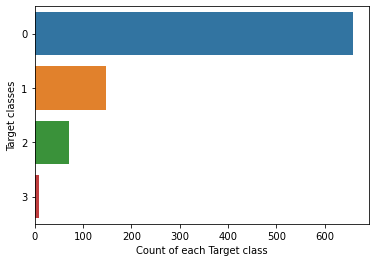

In [16]:
sns.countplot(y=y_train_pagi)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [17]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train_pagi, y_train_pagi)

In [18]:
%%time
y_pred_pagi = modelnb.predict(X_test_pagi)

Wall time: 1.99 ms


In [19]:
print(classification_report(y_test_pagi, y_pred_pagi))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_pagi, y_pred_pagi)))
print('Precision : {:.4f}'.format(precision_score(y_test_pagi, y_pred_pagi, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_pagi, y_pred_pagi, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_pagi, y_pred_pagi, average='weighted')))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       302
           1       0.67      0.85      0.75        46
           2       0.89      0.86      0.87        28
           3       0.56      1.00      0.71         5

    accuracy                           0.92       381
   macro avg       0.77      0.91      0.82       381
weighted avg       0.93      0.92      0.92       381

Accuracy : 0.9186
Precision : 0.9326
Recall : 0.9186
F1-score : 0.9231


In [20]:
ros = RandomOverSampler()
X_train_pagi_ros, y_train_pagi_ros = ros.fit_resample(X_train_pagi, y_train_pagi)
# new class distribution 
print(Counter(y_train_pagi_ros))

Counter({0: 659, 1: 659, 2: 659, 3: 659})


In [21]:
X_train_pagi_ros

,waktu,hari,jlh_motor,jlh_mobil,jlh_truck,headway,gap,speed>85,avgSpeed,lebar_jln,pjg_antrian
0,0,4,102,297,65,2.96,4.67,48.75,34.12,14.0,120
1,0,0,627,399,82,0.02,1.07,49.50,33.75,6.0,410
2,0,6,172,93,29,1.53,4.83,40.00,37.38,12.5,25
3,0,4,145,784,128,0.47,6.93,44.50,28.94,14.0,270
4,0,2,384,757,30,0.23,5.13,30.00,17.59,14.0,400
...,...,...,...,...,...,...,...,...,...,...,...
2631,0,1,4232,206,139,0.00,1.71,60.25,11.94,21.0,700
2632,0,0,1396,753,229,0.02,1.37,38.25,15.50,21.0,680
2633,0,0,2515,1986,176,0.00,0.83,49.75,14.06,21.0,680
2634,0,2,2526,2064,291,0.00,0.44,43.00,18.88,21.0,680


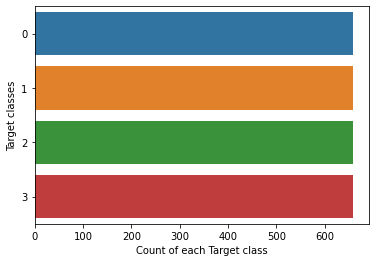

In [22]:
sns.countplot(y=y_train_pagi_ros)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [23]:
modelnb = GaussianNB()
modelnb.fit(X_train_pagi_ros, y_train_pagi_ros)

GaussianNB()

In [24]:
%%time
y_pred_pagi = modelnb.predict(X_test_pagi)

Wall time: 996 µs


In [25]:
print(classification_report(y_test_pagi, y_pred_pagi))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_pagi, y_pred_pagi)))
print('Precision : {:.4f}'.format(precision_score(y_test_pagi, y_pred_pagi, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_pagi, y_pred_pagi, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_pagi, y_pred_pagi, average='weighted')))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       302
           1       0.60      0.87      0.71        46
           2       0.92      0.86      0.89        28
           3       0.56      1.00      0.71         5

    accuracy                           0.90       381
   macro avg       0.77      0.91      0.81       381
weighted avg       0.93      0.90      0.91       381

Accuracy : 0.9029
Precision : 0.9285
Recall : 0.9029
F1-score : 0.9105


# SIANG

In [26]:
X_siang = df_siang.drop(['nama_jalan','lajur','Latitude','Longtitude','tanggal','jumlah','occupancy','kemacetan'],axis=1)
y_siang = df_siang['kemacetan']

In [27]:
X_train_siang, X_test_siang, y_train_siang, y_test_siang = train_test_split(X_siang, y_siang, test_size = 0.30, random_state = 0)

In [28]:
X_train_siang

,waktu,hari,jlh_motor,jlh_mobil,jlh_truck,headway,gap,speed>85,avgSpeed,lebar_jln,pjg_antrian
3208,1,4,288,775,67,0.90,2.21,36.25,31.62,14.0,170
1671,1,0,126,895,81,2.24,3.29,64.25,35.19,14.0,410
3592,1,5,253,92,101,3.03,6.30,79.25,57.88,6.0,30
2564,1,6,572,702,66,0.79,2.82,35.00,22.44,12.5,300
1740,1,3,189,470,154,0.58,10.15,49.00,25.44,14.0,400
...,...,...,...,...,...,...,...,...,...,...,...
2369,1,0,546,349,83,0.24,4.05,39.00,31.38,12.5,330
2565,1,2,374,932,52,0.33,2.02,38.75,23.31,14.0,300
3631,1,3,611,279,340,2.01,4.08,124.00,100.88,9.5,30
1801,1,1,1181,857,123,0.03,1.86,52.50,29.25,21.0,390


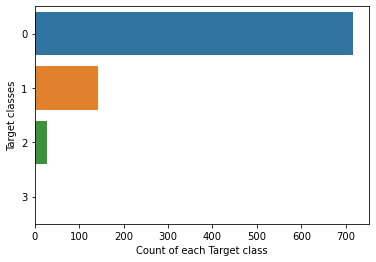

In [29]:
sns.countplot(y=y_train_siang)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [30]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train_siang, y_train_siang)

In [31]:
%%time
y_pred_siang = modelnb.predict(X_test_siang)

Wall time: 2.99 ms


In [32]:
print(classification_report(y_test_siang, y_pred_siang))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_siang, y_pred_siang)))
print('Precision : {:.4f}'.format(precision_score(y_test_siang, y_pred_siang, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_siang, y_pred_siang, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_siang, y_pred_siang, average='weighted')))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       324
           1       0.58      0.87      0.70        45
           2       0.69      0.75      0.72        12

    accuracy                           0.90       381
   macro avg       0.75      0.84      0.79       381
weighted avg       0.93      0.90      0.91       381

Accuracy : 0.9029
Precision : 0.9268
Recall : 0.9029
F1-score : 0.9104


In [33]:
ros = RandomOverSampler()
X_train_siang_ros, y_train_siang_ros = ros.fit_resample(X_train_siang, y_train_siang)
# new class distribution 
print(Counter(y_train_siang_ros))

Counter({0: 717, 1: 717, 2: 717, 3: 717})


In [34]:
X_train_siang_ros

,waktu,hari,jlh_motor,jlh_mobil,jlh_truck,headway,gap,speed>85,avgSpeed,lebar_jln,pjg_antrian
0,1,4,288,775,67,0.90,2.21,36.25,31.62,14.0,170
1,1,0,126,895,81,2.24,3.29,64.25,35.19,14.0,410
2,1,5,253,92,101,3.03,6.30,79.25,57.88,6.0,30
3,1,6,572,702,66,0.79,2.82,35.00,22.44,12.5,300
4,1,3,189,470,154,0.58,10.15,49.00,25.44,14.0,400
...,...,...,...,...,...,...,...,...,...,...,...
2863,1,3,436,575,115,0.04,4.80,43.25,14.94,22.0,680
2864,1,3,436,575,115,0.04,4.80,43.25,14.94,22.0,680
2865,1,3,436,575,115,0.04,4.80,43.25,14.94,22.0,680
2866,1,3,436,575,115,0.04,4.80,43.25,14.94,22.0,680


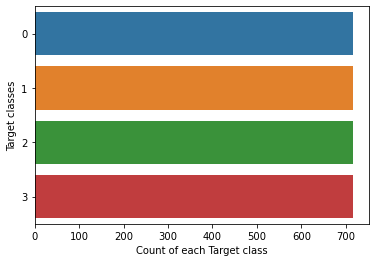

In [35]:
sns.countplot(y=y_train_siang_ros)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [36]:
modelnb = GaussianNB()
modelnb.fit(X_train_siang_ros, y_train_siang_ros)

GaussianNB()

In [37]:
%%time
y_pred_siang = modelnb.predict(X_test_siang)

Wall time: 1.99 ms


In [38]:
print(classification_report(y_test_siang, y_pred_siang))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_siang, y_pred_siang)))
print('Precision : {:.4f}'.format(precision_score(y_test_siang, y_pred_siang, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_siang, y_pred_siang, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_siang, y_pred_siang, average='weighted')))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93       324
           1       0.51      0.84      0.63        45
           2       0.69      0.92      0.79        12

    accuracy                           0.88       381
   macro avg       0.73      0.88      0.78       381
weighted avg       0.92      0.88      0.89       381

Accuracy : 0.8819
Precision : 0.9231
Recall : 0.8819
F1-score : 0.8945


# SORE

In [39]:
X_sore = df_sore.drop(['nama_jalan','lajur','Latitude','Longtitude','tanggal','jumlah','occupancy','kemacetan'],axis=1)
y_sore = df_sore['kemacetan']

In [40]:
X_train_sore, X_test_sore, y_train_sore, y_test_sore = train_test_split(X_sore, y_sore, test_size = 0.30, random_state = 0)

In [41]:
X_train_sore

,waktu,hari,jlh_motor,jlh_mobil,jlh_truck,headway,gap,speed>85,avgSpeed,lebar_jln,pjg_antrian
3047,2,4,474,226,67,0.73,5.17,36.25,36.44,12.5,210
1322,2,2,1967,660,199,0.30,3.36,37.25,22.38,6.0,450
3571,2,4,510,398,217,0.86,1.87,38.50,32.06,9.5,30
2251,2,0,742,510,135,0.34,2.66,47.50,39.94,6.0,340
1392,2,5,715,824,239,0.69,3.04,39.75,20.69,21.0,440
...,...,...,...,...,...,...,...,...,...,...,...
2022,2,3,832,842,297,0.24,4.63,49.00,22.00,21.0,370
2253,2,1,708,543,155,0.30,1.15,38.25,25.94,9.5,340
3616,2,6,163,77,27,1.90,12.39,40.00,35.81,22.0,30
1443,2,1,342,754,32,0.09,3.82,29.00,10.85,14.0,430


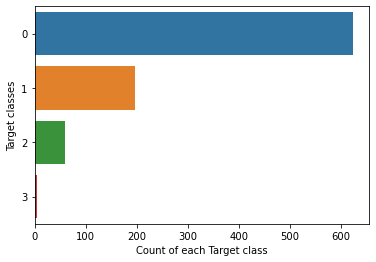

In [42]:
sns.countplot(y=y_train_sore)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [43]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train_sore, y_train_sore)

In [44]:
%%time
y_pred_sore = modelnb.predict(X_test_sore)

Wall time: 2.99 ms


In [45]:
print(classification_report(y_test_sore, y_pred_sore))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_sore, y_pred_sore)))
print('Precision : {:.4f}'.format(precision_score(y_test_sore, y_pred_sore, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_sore, y_pred_sore, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_sore, y_pred_sore, average='weighted')))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       289
           1       0.56      0.80      0.66        65
           2       0.72      0.78      0.75        23
           3       0.00      0.00      0.00         4

    accuracy                           0.84       381
   macro avg       0.56      0.61      0.58       381
weighted avg       0.86      0.84      0.84       381

Accuracy : 0.8373
Precision : 0.8597
Recall : 0.8373
F1-score : 0.8431


In [46]:
ros = RandomOverSampler()
X_train_sore_ros, y_train_sore_ros = ros.fit_resample(X_train_sore, y_train_sore)
# new class distribution 
print(Counter(y_train_sore_ros))

Counter({0: 625, 1: 625, 2: 625, 3: 625})


In [47]:
X_train_sore_ros

,waktu,hari,jlh_motor,jlh_mobil,jlh_truck,headway,gap,speed>85,avgSpeed,lebar_jln,pjg_antrian
0,2,4,474,226,67,0.73,5.17,36.25,36.44,12.5,210
1,2,2,1967,660,199,0.30,3.36,37.25,22.38,6.0,450
2,2,4,510,398,217,0.86,1.87,38.50,32.06,9.5,30
3,2,0,742,510,135,0.34,2.66,47.50,39.94,6.0,340
4,2,5,715,824,239,0.69,3.04,39.75,20.69,21.0,440
...,...,...,...,...,...,...,...,...,...,...,...
2495,2,1,579,313,89,0.08,6.23,29.25,14.34,21.0,680
2496,2,3,395,323,157,0.03,6.34,40.75,22.50,12.5,680
2497,2,4,495,434,215,0.25,3.34,43.50,22.75,22.0,680
2498,2,3,395,323,157,0.03,6.34,40.75,22.50,12.5,680


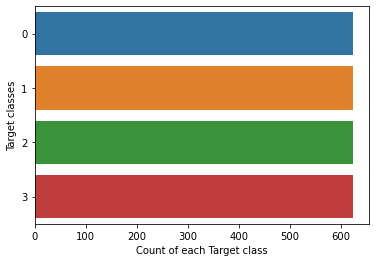

In [48]:
sns.countplot(y=y_train_sore_ros)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [49]:
modelnb = GaussianNB()
modelnb.fit(X_train_sore_ros, y_train_sore_ros)

GaussianNB()

In [50]:
%%time
y_pred_sore = modelnb.predict(X_test_sore)

Wall time: 1.99 ms


In [51]:
print(classification_report(y_test_sore, y_pred_sore))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_sore, y_pred_sore)))
print('Precision : {:.4f}'.format(precision_score(y_test_sore, y_pred_sore, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_sore, y_pred_sore, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_sore, y_pred_sore, average='weighted')))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       289
           1       0.48      0.77      0.59        65
           2       0.64      0.78      0.71        23
           3       0.00      0.00      0.00         4

    accuracy                           0.80       381
   macro avg       0.52      0.59      0.54       381
weighted avg       0.84      0.80      0.81       381

Accuracy : 0.7979
Precision : 0.8448
Recall : 0.7979
F1-score : 0.8109


# Combine PAGI SIANG SORE

In [52]:
X_akhir = df.copy()
y_akhir = df['kemacetan']

In [53]:
# melakukan split data menjadi 70% data train : 30% data test
X_train_akhir, X_test_akhir, y_train_akhir, y_test_akhir = train_test_split(X_akhir, y_akhir, test_size = 0.30, random_state = 0)

In [54]:
X = df.drop(['nama_jalan','lajur','Latitude','Longtitude','tanggal','jumlah','occupancy','kemacetan'],axis=1)
y = df['kemacetan']

In [55]:
# melakukan split data menjadi 70% data train : 30% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [56]:
X_train

,waktu,hari,jlh_motor,jlh_mobil,jlh_truck,headway,gap,speed>85,avgSpeed,lebar_jln,pjg_antrian
3782,0,2,451,301,78,4.01,4.57,135.50,136.81,14.0,10
529,2,1,1400,2517,208,0.00,0.61,43.75,17.75,14.0,540
2480,2,0,631,204,57,0.43,2.34,39.50,28.94,12.5,310
1888,1,1,541,276,12,0.44,3.12,75.75,53.56,14.0,380
2075,2,3,315,823,303,0.99,4.56,44.00,13.88,7.2,360
...,...,...,...,...,...,...,...,...,...,...,...
835,1,6,418,1085,71,0.23,2.61,49.50,25.69,14.0,500
3264,2,1,475,207,76,1.94,4.44,39.50,32.31,12.5,160
1653,1,6,502,758,184,0.11,4.92,36.50,19.75,6.0,410
2607,0,2,951,818,456,0.19,1.63,127.00,59.62,9.5,290


In [57]:
X_train_akhir

,nama_jalan,Latitude,Longtitude,lajur,waktu,hari,tanggal,jlh_motor,jlh_mobil,jlh_truck,jumlah,headway,gap,speed>85,avgSpeed,occupancy,lebar_jln,pjg_antrian,kemacetan
3782,SP. PASIR KALIKI,-6.900525,107.597353,BELOK KIRI,0,2,13-04-2022 07:00,451,301,78,830,4.01,4.57,135.50,136.81,1.77,14.0,10,0
529,SP. PASTEUR,-6.892134,107.581117,LURUS KANAN,2,1,05-04-2022 16:00,1400,2517,208,4125,0.00,0.61,43.75,17.75,64.79,14.0,540,1
2480,SP. M TOHA,-6.948332,107.609386,BELOK KIRI,2,0,18-04-2022 16:00,631,204,57,892,0.43,2.34,39.50,28.94,41.28,12.5,310,0
1888,SP. ISTANA PLAZA,-6.906442,107.597545,Belok kiri,1,1,19-04-2022 12:00,541,276,12,829,0.44,3.12,75.75,53.56,48.72,14.0,380,0
2075,SP. GEDE BAGE,-6.937128,107.692583,Lurus kanan,2,3,21-04-2022 16:00,315,823,303,1441,0.99,4.56,44.00,13.88,46.46,7.2,360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,SP. ISTANA PLAZA,-6.906442,107.597545,LURUS KIRI,1,6,17-04-2022 12:00,418,1085,71,1574,0.23,2.61,49.50,25.69,60.72,14.0,500,1
3264,SP. M TOHA,-6.948332,107.609386,BELOK KIRI,2,1,05-04-2022 16:00,475,207,76,758,1.94,4.44,39.50,32.31,26.04,12.5,160,0
1653,SP. UJUNG BERUNG,-6.914068,107.699412,Lurus kanan,1,6,24-04-2022 07:00,502,758,184,1444,0.11,4.92,36.50,19.75,51.31,6.0,410,0
2607,SP. CIBEREUM,-6.917224,107.574382,LURUS,0,2,27-04-2022 07:00,951,818,456,2225,0.19,1.63,127.00,59.62,39.23,9.5,290,0


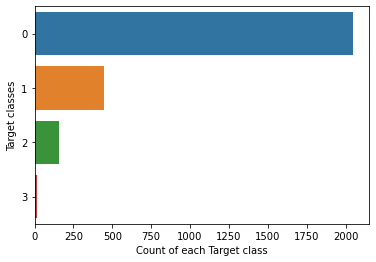

In [58]:
sns.countplot(y=y_train)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [59]:
X_test

,waktu,hari,jlh_motor,jlh_mobil,jlh_truck,headway,gap,speed>85,avgSpeed,lebar_jln,pjg_antrian
2808,0,0,873,853,136,0.81,3.94,44.50,22.25,7.2,260
2377,2,5,597,922,97,0.43,1.56,53.75,32.19,14.0,320
796,2,6,525,1066,81,0.14,1.40,42.50,19.81,21.0,510
3414,2,1,1048,270,362,0.56,1.80,108.75,92.50,9.5,100
2356,2,0,611,915,53,0.13,1.98,41.25,26.62,14.0,330
...,...,...,...,...,...,...,...,...,...,...,...
1110,0,4,327,154,29,0.44,7.76,54.25,21.25,21.0,470
3771,1,4,169,60,78,3.96,10.66,79.25,58.62,6.0,15
2373,2,5,697,197,16,0.75,1.68,37.50,31.00,14.0,320
1642,2,4,921,797,181,0.03,2.31,36.75,16.56,12.5,410


In [60]:
X_test_akhir

,nama_jalan,Latitude,Longtitude,lajur,waktu,hari,tanggal,jlh_motor,jlh_mobil,jlh_truck,jumlah,headway,gap,speed>85,avgSpeed,occupancy,lebar_jln,pjg_antrian,kemacetan
2808,SP. GEDE BAGE,-6.937128,107.692583,LURUS KANAN,0,0,18-04-2022 07:00,873,853,136,1862,0.81,3.94,44.50,22.25,36.16,7.2,260,0
2377,SP. ISTANA PLAZA,-6.906442,107.597545,Lurus kiri,2,5,23-04-2022 16:00,597,922,97,1616,0.43,1.56,53.75,32.19,42.73,14.0,320,0
796,SP. BUAH BATU,-6.947987,107.633434,LURUS KANAN,2,6,17-04-2022 16:00,525,1066,81,1672,0.14,1.40,42.50,19.81,61.15,21.0,510,1
3414,SP. CIBEREUM,-6.917224,107.574382,BELOK KIRI,2,1,05-04-2022 16:00,1048,270,362,1680,0.56,1.80,108.75,92.50,19.98,9.5,100,0
2356,SP. PASIR KALIKI,-6.900525,107.597353,LURUS KANAN,2,0,25-04-2022 16:00,611,915,53,1579,0.13,1.98,41.25,26.62,42.89,14.0,330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,SP. BUAH BATU,-6.947987,107.633434,Lurus kanan,0,4,22-04-2022 07:00,327,154,29,510,0.44,7.76,54.25,21.25,57.45,21.0,470,0
3771,SP. UJUNG BERUNG,-6.914068,107.699412,BELOK KIRI,1,4,29-04-2022 12:00,169,60,78,307,3.96,10.66,79.25,58.62,2.65,6.0,15,0
2373,SP. ISTANA PLAZA,-6.906442,107.597545,BELOK KIRI,2,5,02-04-2022 16:00,697,197,16,910,0.75,1.68,37.50,31.00,42.77,14.0,320,0
1642,SP. M TOHA,-6.948332,107.609386,LURUS KANAN,2,4,08-04-2022 16:00,921,797,181,1899,0.03,2.31,36.75,16.56,51.41,12.5,410,0


# Naive Bayes Classification

In [61]:
modelnb = GaussianNB()
modelnb.fit(X_train, y_train)

GaussianNB()

In [62]:
%%time
y_pred = modelnb.predict(X_test)

Wall time: 999 µs


In [63]:
print(classification_report(y_test, y_pred))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       866
           1       0.61      0.94      0.74       198
           2       0.92      0.82      0.87        67
           3       0.60      0.82      0.69        11

    accuracy                           0.88      1142
   macro avg       0.78      0.86      0.81      1142
weighted avg       0.91      0.88      0.89      1142

Accuracy : 0.8774
Precision : 0.9130
Recall : 0.8774
F1-score : 0.8861


# OverSampling

In [64]:
ros = RandomOverSampler()
X_train_akhir_ros, y_train_akhir_ros = ros.fit_resample(X_train_akhir, y_train_akhir)
# new class distribution 
print(Counter(y_train_akhir_ros))

Counter({0: 2050, 1: 2050, 2: 2050, 3: 2050})


In [65]:
# Inisiasi random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
# new class distribution 
print(Counter(y_train_ros))

Counter({0: 2050, 1: 2050, 2: 2050, 3: 2050})


In [66]:
X_train_ros

,waktu,hari,jlh_motor,jlh_mobil,jlh_truck,headway,gap,speed>85,avgSpeed,lebar_jln,pjg_antrian
0,0,2,451,301,78,4.01,4.57,135.50,136.81,14.0,10
1,2,1,1400,2517,208,0.00,0.61,43.75,17.75,14.0,540
2,2,0,631,204,57,0.43,2.34,39.50,28.94,12.5,310
3,1,1,541,276,12,0.44,3.12,75.75,53.56,14.0,380
4,2,3,315,823,303,0.99,4.56,44.00,13.88,7.2,360
...,...,...,...,...,...,...,...,...,...,...,...
8195,0,0,2515,1986,176,0.00,0.83,49.75,14.06,21.0,680
8196,0,1,540,471,244,0.51,7.67,44.00,25.12,22.0,680
8197,2,3,395,323,157,0.03,6.34,40.75,22.50,12.5,680
8198,2,2,269,271,63,0.41,14.93,44.75,24.94,21.0,680


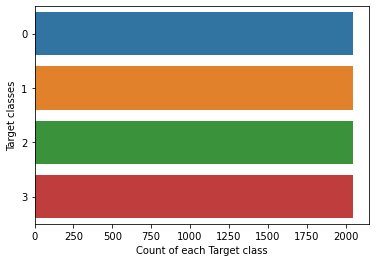

In [67]:
sns.countplot(y=y_train_ros)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [68]:
modelnb = GaussianNB()
modelnb.fit(X_train_ros, y_train_ros)

GaussianNB()

In [69]:
%%time
y_pred = modelnb.predict(X_test)

Wall time: 2.99 ms


In [70]:
print(classification_report(y_test, y_pred))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91       866
           1       0.56      0.95      0.71       198
           2       0.90      0.82      0.86        67
           3       0.59      0.91      0.71        11

    accuracy                           0.85      1142
   macro avg       0.76      0.88      0.80      1142
weighted avg       0.91      0.85      0.87      1142

Accuracy : 0.8546
Precision : 0.9082
Recall : 0.8546
F1-score : 0.8670


# Hyperparameter Tuning

In [71]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [72]:
np.logspace(0,-9, num=100)

array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00000000e-05,
      

In [73]:
# mencari parameter terbaik
gs_NB = GridSearchCV(estimator=modelnb, 
                     param_grid=params_NB, 
                     cv=10,
                     verbose=10, 
                     scoring='accuracy')
gs_NB.fit(X_train_ros,y_train_ros)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START var_smoothing=1.0........................................
[CV 1/10; 1/100] END .........var_smoothing=1.0;, score=0.362 total time=   0.0s
[CV 2/10; 1/100] START var_smoothing=1.0........................................
[CV 2/10; 1/100] END .........var_smoothing=1.0;, score=0.376 total time=   0.0s
[CV 3/10; 1/100] START var_smoothing=1.0........................................
[CV 3/10; 1/100] END .........var_smoothing=1.0;, score=0.363 total time=   0.0s
[CV 4/10; 1/100] START var_smoothing=1.0........................................
[CV 4/10; 1/100] END .........var_smoothing=1.0;, score=0.351 total time=   0.0s
[CV 5/10; 1/100] START var_smoothing=1.0........................................
[CV 5/10; 1/100] END .........var_smoothing=1.0;, score=0.354 total time=   0.0s
[CV 6/10; 1/100] START var_smoothing=1.0........................................
[CV 6/10; 1/100] END .........var_smoothing=

[CV 1/10; 7/100] END var_smoothing=0.2848035868435802;, score=0.441 total time=   0.0s
[CV 2/10; 7/100] START var_smoothing=0.2848035868435802.........................
[CV 2/10; 7/100] END var_smoothing=0.2848035868435802;, score=0.432 total time=   0.0s
[CV 3/10; 7/100] START var_smoothing=0.2848035868435802.........................
[CV 3/10; 7/100] END var_smoothing=0.2848035868435802;, score=0.399 total time=   0.0s
[CV 4/10; 7/100] START var_smoothing=0.2848035868435802.........................
[CV 4/10; 7/100] END var_smoothing=0.2848035868435802;, score=0.407 total time=   0.0s
[CV 5/10; 7/100] START var_smoothing=0.2848035868435802.........................
[CV 5/10; 7/100] END var_smoothing=0.2848035868435802;, score=0.452 total time=   0.0s
[CV 6/10; 7/100] START var_smoothing=0.2848035868435802.........................
[CV 6/10; 7/100] END var_smoothing=0.2848035868435802;, score=0.448 total time=   0.0s
[CV 7/10; 7/100] START var_smoothing=0.2848035868435802..................

[CV 1/10; 12/100] END ........var_smoothing=0.1;, score=0.560 total time=   0.0s
[CV 2/10; 12/100] START var_smoothing=0.1.......................................
[CV 2/10; 12/100] END ........var_smoothing=0.1;, score=0.570 total time=   0.0s
[CV 3/10; 12/100] START var_smoothing=0.1.......................................
[CV 3/10; 12/100] END ........var_smoothing=0.1;, score=0.560 total time=   0.0s
[CV 4/10; 12/100] START var_smoothing=0.1.......................................
[CV 4/10; 12/100] END ........var_smoothing=0.1;, score=0.539 total time=   0.0s
[CV 5/10; 12/100] START var_smoothing=0.1.......................................
[CV 5/10; 12/100] END ........var_smoothing=0.1;, score=0.552 total time=   0.0s
[CV 6/10; 12/100] START var_smoothing=0.1.......................................
[CV 6/10; 12/100] END ........var_smoothing=0.1;, score=0.571 total time=   0.0s
[CV 7/10; 12/100] START var_smoothing=0.1.......................................
[CV 7/10; 12/100] END ......

[CV 7/10; 18/100] END var_smoothing=0.02848035868435802;, score=0.632 total time=   0.0s
[CV 8/10; 18/100] START var_smoothing=0.02848035868435802.......................
[CV 8/10; 18/100] END var_smoothing=0.02848035868435802;, score=0.600 total time=   0.0s
[CV 9/10; 18/100] START var_smoothing=0.02848035868435802.......................
[CV 9/10; 18/100] END var_smoothing=0.02848035868435802;, score=0.635 total time=   0.0s
[CV 10/10; 18/100] START var_smoothing=0.02848035868435802......................
[CV 10/10; 18/100] END var_smoothing=0.02848035868435802;, score=0.605 total time=   0.0s
[CV 1/10; 19/100] START var_smoothing=0.02310129700083159.......................
[CV 1/10; 19/100] END var_smoothing=0.02310129700083159;, score=0.615 total time=   0.0s
[CV 2/10; 19/100] START var_smoothing=0.02310129700083159.......................
[CV 2/10; 19/100] END var_smoothing=0.02310129700083159;, score=0.644 total time=   0.0s
[CV 3/10; 19/100] START var_smoothing=0.02310129700083159...

[CV 8/10; 23/100] END .......var_smoothing=0.01;, score=0.656 total time=   0.0s
[CV 9/10; 23/100] START var_smoothing=0.01......................................
[CV 9/10; 23/100] END .......var_smoothing=0.01;, score=0.672 total time=   0.0s
[CV 10/10; 23/100] START var_smoothing=0.01.....................................
[CV 10/10; 23/100] END ......var_smoothing=0.01;, score=0.661 total time=   0.0s
[CV 1/10; 24/100] START var_smoothing=0.008111308307896872......................
[CV 1/10; 24/100] END var_smoothing=0.008111308307896872;, score=0.665 total time=   0.0s
[CV 2/10; 24/100] START var_smoothing=0.008111308307896872......................
[CV 2/10; 24/100] END var_smoothing=0.008111308307896872;, score=0.690 total time=   0.0s
[CV 3/10; 24/100] START var_smoothing=0.008111308307896872......................
[CV 3/10; 24/100] END var_smoothing=0.008111308307896872;, score=0.680 total time=   0.0s
[CV 4/10; 24/100] START var_smoothing=0.008111308307896872......................
[

[CV 2/10; 30/100] END var_smoothing=0.0023101297000831605;, score=0.849 total time=   0.0s
[CV 3/10; 30/100] START var_smoothing=0.0023101297000831605.....................
[CV 3/10; 30/100] END var_smoothing=0.0023101297000831605;, score=0.852 total time=   0.0s
[CV 4/10; 30/100] START var_smoothing=0.0023101297000831605.....................
[CV 4/10; 30/100] END var_smoothing=0.0023101297000831605;, score=0.837 total time=   0.0s
[CV 5/10; 30/100] START var_smoothing=0.0023101297000831605.....................
[CV 5/10; 30/100] END var_smoothing=0.0023101297000831605;, score=0.828 total time=   0.0s
[CV 6/10; 30/100] START var_smoothing=0.0023101297000831605.....................
[CV 6/10; 30/100] END var_smoothing=0.0023101297000831605;, score=0.852 total time=   0.0s
[CV 7/10; 30/100] START var_smoothing=0.0023101297000831605.....................
[CV 7/10; 30/100] END var_smoothing=0.0023101297000831605;, score=0.834 total time=   0.0s
[CV 8/10; 30/100] START var_smoothing=0.002310129

[CV 2/10; 35/100] END var_smoothing=0.0008111308307896872;, score=0.906 total time=   0.0s
[CV 3/10; 35/100] START var_smoothing=0.0008111308307896872.....................
[CV 3/10; 35/100] END var_smoothing=0.0008111308307896872;, score=0.911 total time=   0.0s
[CV 4/10; 35/100] START var_smoothing=0.0008111308307896872.....................
[CV 4/10; 35/100] END var_smoothing=0.0008111308307896872;, score=0.906 total time=   0.0s
[CV 5/10; 35/100] START var_smoothing=0.0008111308307896872.....................
[CV 5/10; 35/100] END var_smoothing=0.0008111308307896872;, score=0.910 total time=   0.0s
[CV 6/10; 35/100] START var_smoothing=0.0008111308307896872.....................
[CV 6/10; 35/100] END var_smoothing=0.0008111308307896872;, score=0.902 total time=   0.0s
[CV 7/10; 35/100] START var_smoothing=0.0008111308307896872.....................
[CV 7/10; 35/100] END var_smoothing=0.0008111308307896872;, score=0.893 total time=   0.0s
[CV 8/10; 35/100] START var_smoothing=0.000811130

[CV 9/10; 41/100] END var_smoothing=0.0002310129700083158;, score=0.927 total time=   0.0s
[CV 10/10; 41/100] START var_smoothing=0.0002310129700083158....................
[CV 10/10; 41/100] END var_smoothing=0.0002310129700083158;, score=0.915 total time=   0.0s
[CV 1/10; 42/100] START var_smoothing=0.0001873817422860383.....................
[CV 1/10; 42/100] END var_smoothing=0.0001873817422860383;, score=0.902 total time=   0.0s
[CV 2/10; 42/100] START var_smoothing=0.0001873817422860383.....................
[CV 2/10; 42/100] END var_smoothing=0.0001873817422860383;, score=0.912 total time=   0.0s
[CV 3/10; 42/100] START var_smoothing=0.0001873817422860383.....................
[CV 3/10; 42/100] END var_smoothing=0.0001873817422860383;, score=0.917 total time=   0.0s
[CV 4/10; 42/100] START var_smoothing=0.0001873817422860383.....................
[CV 4/10; 42/100] END var_smoothing=0.0001873817422860383;, score=0.916 total time=   0.0s
[CV 5/10; 42/100] START var_smoothing=0.00018738

[CV 10/10; 46/100] END var_smoothing=8.111308307896872e-05;, score=0.917 total time=   0.0s
[CV 1/10; 47/100] START var_smoothing=6.579332246575683e-05.....................
[CV 1/10; 47/100] END var_smoothing=6.579332246575683e-05;, score=0.902 total time=   0.0s
[CV 2/10; 47/100] START var_smoothing=6.579332246575683e-05.....................
[CV 2/10; 47/100] END var_smoothing=6.579332246575683e-05;, score=0.907 total time=   0.0s
[CV 3/10; 47/100] START var_smoothing=6.579332246575683e-05.....................
[CV 3/10; 47/100] END var_smoothing=6.579332246575683e-05;, score=0.915 total time=   0.0s
[CV 4/10; 47/100] START var_smoothing=6.579332246575683e-05.....................
[CV 4/10; 47/100] END var_smoothing=6.579332246575683e-05;, score=0.911 total time=   0.0s
[CV 5/10; 47/100] START var_smoothing=6.579332246575683e-05.....................
[CV 5/10; 47/100] END var_smoothing=6.579332246575683e-05;, score=0.920 total time=   0.0s
[CV 6/10; 47/100] START var_smoothing=6.57933224

[CV 5/10; 53/100] END var_smoothing=1.873817422860383e-05;, score=0.918 total time=   0.0s
[CV 6/10; 53/100] START var_smoothing=1.873817422860383e-05.....................
[CV 6/10; 53/100] END var_smoothing=1.873817422860383e-05;, score=0.913 total time=   0.0s
[CV 7/10; 53/100] START var_smoothing=1.873817422860383e-05.....................
[CV 7/10; 53/100] END var_smoothing=1.873817422860383e-05;, score=0.909 total time=   0.0s
[CV 8/10; 53/100] START var_smoothing=1.873817422860383e-05.....................
[CV 8/10; 53/100] END var_smoothing=1.873817422860383e-05;, score=0.900 total time=   0.0s
[CV 9/10; 53/100] START var_smoothing=1.873817422860383e-05.....................
[CV 9/10; 53/100] END var_smoothing=1.873817422860383e-05;, score=0.922 total time=   0.0s
[CV 10/10; 53/100] START var_smoothing=1.873817422860383e-05....................
[CV 10/10; 53/100] END var_smoothing=1.873817422860383e-05;, score=0.910 total time=   0.0s
[CV 1/10; 54/100] START var_smoothing=1.51991108

[CV 7/10; 58/100] END var_smoothing=6.579332246575683e-06;, score=0.905 total time=   0.0s
[CV 8/10; 58/100] START var_smoothing=6.579332246575683e-06.....................
[CV 8/10; 58/100] END var_smoothing=6.579332246575683e-06;, score=0.895 total time=   0.0s
[CV 9/10; 58/100] START var_smoothing=6.579332246575683e-06.....................
[CV 9/10; 58/100] END var_smoothing=6.579332246575683e-06;, score=0.922 total time=   0.0s
[CV 10/10; 58/100] START var_smoothing=6.579332246575683e-06....................
[CV 10/10; 58/100] END var_smoothing=6.579332246575683e-06;, score=0.909 total time=   0.0s
[CV 1/10; 59/100] START var_smoothing=5.336699231206313e-06.....................
[CV 1/10; 59/100] END var_smoothing=5.336699231206313e-06;, score=0.872 total time=   0.0s
[CV 2/10; 59/100] START var_smoothing=5.336699231206313e-06.....................
[CV 2/10; 59/100] END var_smoothing=5.336699231206313e-06;, score=0.895 total time=   0.0s
[CV 3/10; 59/100] START var_smoothing=5.33669923

[CV 2/10; 65/100] END var_smoothing=1.519911082952933e-06;, score=0.887 total time=   0.0s
[CV 3/10; 65/100] START var_smoothing=1.519911082952933e-06.....................
[CV 3/10; 65/100] END var_smoothing=1.519911082952933e-06;, score=0.885 total time=   0.0s
[CV 4/10; 65/100] START var_smoothing=1.519911082952933e-06.....................
[CV 4/10; 65/100] END var_smoothing=1.519911082952933e-06;, score=0.870 total time=   0.0s
[CV 5/10; 65/100] START var_smoothing=1.519911082952933e-06.....................
[CV 5/10; 65/100] END var_smoothing=1.519911082952933e-06;, score=0.884 total time=   0.0s
[CV 6/10; 65/100] START var_smoothing=1.519911082952933e-06.....................
[CV 6/10; 65/100] END var_smoothing=1.519911082952933e-06;, score=0.885 total time=   0.0s
[CV 7/10; 65/100] START var_smoothing=1.519911082952933e-06.....................
[CV 7/10; 65/100] END var_smoothing=1.519911082952933e-06;, score=0.883 total time=   0.0s
[CV 8/10; 65/100] START var_smoothing=1.519911082

[CV 3/10; 70/100] END var_smoothing=5.336699231206313e-07;, score=0.887 total time=   0.0s
[CV 4/10; 70/100] START var_smoothing=5.336699231206313e-07.....................
[CV 4/10; 70/100] END var_smoothing=5.336699231206313e-07;, score=0.873 total time=   0.0s
[CV 5/10; 70/100] START var_smoothing=5.336699231206313e-07.....................
[CV 5/10; 70/100] END var_smoothing=5.336699231206313e-07;, score=0.883 total time=   0.0s
[CV 6/10; 70/100] START var_smoothing=5.336699231206313e-07.....................
[CV 6/10; 70/100] END var_smoothing=5.336699231206313e-07;, score=0.887 total time=   0.0s
[CV 7/10; 70/100] START var_smoothing=5.336699231206313e-07.....................
[CV 7/10; 70/100] END var_smoothing=5.336699231206313e-07;, score=0.887 total time=   0.0s
[CV 8/10; 70/100] START var_smoothing=5.336699231206313e-07.....................
[CV 8/10; 70/100] END var_smoothing=5.336699231206313e-07;, score=0.874 total time=   0.0s
[CV 9/10; 70/100] START var_smoothing=5.336699231

[CV 8/10; 76/100] END var_smoothing=1.519911082952933e-07;, score=0.865 total time=   0.0s
[CV 9/10; 76/100] START var_smoothing=1.519911082952933e-07.....................
[CV 9/10; 76/100] END var_smoothing=1.519911082952933e-07;, score=0.894 total time=   0.0s
[CV 10/10; 76/100] START var_smoothing=1.519911082952933e-07....................
[CV 10/10; 76/100] END var_smoothing=1.519911082952933e-07;, score=0.877 total time=   0.0s
[CV 1/10; 77/100] START var_smoothing=1.232846739442066e-07.....................
[CV 1/10; 77/100] END var_smoothing=1.232846739442066e-07;, score=0.868 total time=   0.0s
[CV 2/10; 77/100] START var_smoothing=1.232846739442066e-07.....................
[CV 2/10; 77/100] END var_smoothing=1.232846739442066e-07;, score=0.872 total time=   0.0s
[CV 3/10; 77/100] START var_smoothing=1.232846739442066e-07.....................
[CV 3/10; 77/100] END var_smoothing=1.232846739442066e-07;, score=0.877 total time=   0.0s
[CV 4/10; 77/100] START var_smoothing=1.23284673

[CV 10/10; 81/100] END var_smoothing=5.336699231206302e-08;, score=0.870 total time=   0.0s
[CV 1/10; 82/100] START var_smoothing=4.3287612810830526e-08....................
[CV 1/10; 82/100] END var_smoothing=4.3287612810830526e-08;, score=0.867 total time=   0.0s
[CV 2/10; 82/100] START var_smoothing=4.3287612810830526e-08....................
[CV 2/10; 82/100] END var_smoothing=4.3287612810830526e-08;, score=0.872 total time=   0.0s
[CV 3/10; 82/100] START var_smoothing=4.3287612810830526e-08....................
[CV 3/10; 82/100] END var_smoothing=4.3287612810830526e-08;, score=0.877 total time=   0.0s
[CV 4/10; 82/100] START var_smoothing=4.3287612810830526e-08....................
[CV 4/10; 82/100] END var_smoothing=4.3287612810830526e-08;, score=0.866 total time=   0.0s
[CV 5/10; 82/100] START var_smoothing=4.3287612810830526e-08....................
[CV 5/10; 82/100] END var_smoothing=4.3287612810830526e-08;, score=0.873 total time=   0.0s
[CV 6/10; 82/100] START var_smoothing=4.328

[CV 6/10; 88/100] END var_smoothing=1.232846739442066e-08;, score=0.873 total time=   0.0s
[CV 7/10; 88/100] START var_smoothing=1.232846739442066e-08.....................
[CV 7/10; 88/100] END var_smoothing=1.232846739442066e-08;, score=0.870 total time=   0.0s
[CV 8/10; 88/100] START var_smoothing=1.232846739442066e-08.....................
[CV 8/10; 88/100] END var_smoothing=1.232846739442066e-08;, score=0.857 total time=   0.0s
[CV 9/10; 88/100] START var_smoothing=1.232846739442066e-08.....................
[CV 9/10; 88/100] END var_smoothing=1.232846739442066e-08;, score=0.893 total time=   0.0s
[CV 10/10; 88/100] START var_smoothing=1.232846739442066e-08....................
[CV 10/10; 88/100] END var_smoothing=1.232846739442066e-08;, score=0.867 total time=   0.0s
[CV 1/10; 89/100] START var_smoothing=1e-08.....................................
[CV 1/10; 89/100] END ......var_smoothing=1e-08;, score=0.867 total time=   0.0s
[CV 2/10; 89/100] START var_smoothing=1e-08...............

[CV 8/10; 93/100] END var_smoothing=4.328761281083061e-09;, score=0.859 total time=   0.0s
[CV 9/10; 93/100] START var_smoothing=4.328761281083061e-09.....................
[CV 9/10; 93/100] END var_smoothing=4.328761281083061e-09;, score=0.893 total time=   0.0s
[CV 10/10; 93/100] START var_smoothing=4.328761281083061e-09....................
[CV 10/10; 93/100] END var_smoothing=4.328761281083061e-09;, score=0.870 total time=   0.0s
[CV 1/10; 94/100] START var_smoothing=3.5111917342151273e-09....................
[CV 1/10; 94/100] END var_smoothing=3.5111917342151273e-09;, score=0.867 total time=   0.0s
[CV 2/10; 94/100] START var_smoothing=3.5111917342151273e-09....................
[CV 2/10; 94/100] END var_smoothing=3.5111917342151273e-09;, score=0.883 total time=   0.0s
[CV 3/10; 94/100] START var_smoothing=3.5111917342151273e-09....................
[CV 3/10; 94/100] END var_smoothing=3.5111917342151273e-09;, score=0.876 total time=   0.0s
[CV 4/10; 94/100] START var_smoothing=3.51119

[CV 4/10; 100/100] END .....var_smoothing=1e-09;, score=0.866 total time=   0.0s
[CV 5/10; 100/100] START var_smoothing=1e-09....................................
[CV 5/10; 100/100] END .....var_smoothing=1e-09;, score=0.877 total time=   0.0s
[CV 6/10; 100/100] START var_smoothing=1e-09....................................
[CV 6/10; 100/100] END .....var_smoothing=1e-09;, score=0.877 total time=   0.0s
[CV 7/10; 100/100] START var_smoothing=1e-09....................................
[CV 7/10; 100/100] END .....var_smoothing=1e-09;, score=0.872 total time=   0.0s
[CV 8/10; 100/100] START var_smoothing=1e-09....................................
[CV 8/10; 100/100] END .....var_smoothing=1e-09;, score=0.859 total time=   0.0s
[CV 9/10; 100/100] START var_smoothing=1e-09....................................
[CV 9/10; 100/100] END .....var_smoothing=1e-09;, score=0.893 total time=   0.0s
[CV 10/10; 100/100] START var_smoothing=1e-09...................................
[CV 10/10; 100/100] END ....

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=10)

In [74]:
# melihat parameter terbaik dan skor terbaik
print(gs_NB.best_estimator_)
print(gs_NB.best_score_)

GaussianNB(var_smoothing=0.0002848035868435802)
0.9171951219512197


In [75]:
%%time
y_predht = gs_NB.predict(X_test)

Wall time: 1.99 ms


In [76]:
# hasil pengujian menggunakan data test setelah menggunakan parameter terbaik
print(classification_report(y_test, y_predht))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_predht)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_predht, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_predht, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_predht, average='weighted')))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       866
           1       0.64      0.96      0.77       198
           2       0.90      0.79      0.84        67
           3       0.46      1.00      0.63        11

    accuracy                           0.89      1142
   macro avg       0.75      0.91      0.79      1142
weighted avg       0.92      0.89      0.90      1142

Accuracy : 0.8888
Precision : 0.9247
Recall : 0.8888
F1-score : 0.8973


In [77]:
X_test_akhir['kemacetan'] = y_predht
X_test_akhir

,nama_jalan,Latitude,Longtitude,lajur,waktu,hari,tanggal,jlh_motor,jlh_mobil,jlh_truck,jumlah,headway,gap,speed>85,avgSpeed,occupancy,lebar_jln,pjg_antrian,kemacetan
2808,SP. GEDE BAGE,-6.937128,107.692583,LURUS KANAN,0,0,18-04-2022 07:00,873,853,136,1862,0.81,3.94,44.50,22.25,36.16,7.2,260,0
2377,SP. ISTANA PLAZA,-6.906442,107.597545,Lurus kiri,2,5,23-04-2022 16:00,597,922,97,1616,0.43,1.56,53.75,32.19,42.73,14.0,320,0
796,SP. BUAH BATU,-6.947987,107.633434,LURUS KANAN,2,6,17-04-2022 16:00,525,1066,81,1672,0.14,1.40,42.50,19.81,61.15,21.0,510,1
3414,SP. CIBEREUM,-6.917224,107.574382,BELOK KIRI,2,1,05-04-2022 16:00,1048,270,362,1680,0.56,1.80,108.75,92.50,19.98,9.5,100,0
2356,SP. PASIR KALIKI,-6.900525,107.597353,LURUS KANAN,2,0,25-04-2022 16:00,611,915,53,1579,0.13,1.98,41.25,26.62,42.89,14.0,330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,SP. BUAH BATU,-6.947987,107.633434,Lurus kanan,0,4,22-04-2022 07:00,327,154,29,510,0.44,7.76,54.25,21.25,57.45,21.0,470,1
3771,SP. UJUNG BERUNG,-6.914068,107.699412,BELOK KIRI,1,4,29-04-2022 12:00,169,60,78,307,3.96,10.66,79.25,58.62,2.65,6.0,15,0
2373,SP. ISTANA PLAZA,-6.906442,107.597545,BELOK KIRI,2,5,02-04-2022 16:00,697,197,16,910,0.75,1.68,37.50,31.00,42.77,14.0,320,0
1642,SP. M TOHA,-6.948332,107.609386,LURUS KANAN,2,4,08-04-2022 16:00,921,797,181,1899,0.03,2.31,36.75,16.56,51.41,12.5,410,0


In [71]:
# X_test_akhir.to_csv("NB baru.csv", index=False)